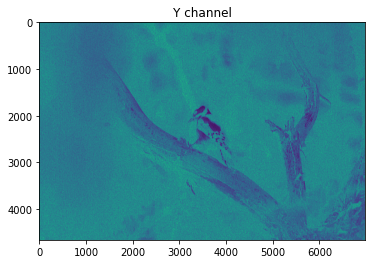

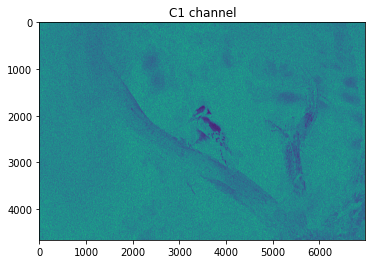

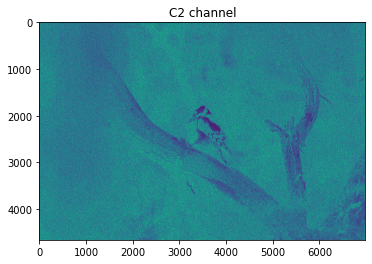

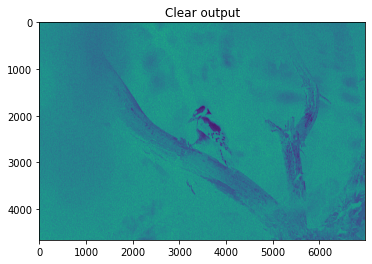

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import rawpy
import cv2

raw = rawpy.imread("IMG_4782.CR3")
array = np.array(raw.raw_image_visible)

# Initialize channels with zeros
Y_channel_mask = np.zeros_like(array)
C1_channel_mask = np.zeros_like(array)
C2_channel_mask = np.zeros_like(array)

# Populate Y channel positions with original values
Y_channel_mask[0::2, 1::2] = array[0::2, 1::2]  # top-right of each 2x2 block (G)
Y_channel_mask[1::2, 0::2] = array[1::2, 0::2]  # bottom-left of each 2x2 block (G)

# Populate C1 channel positions with original values (Red)
C1_channel_mask[1::2, 1::2] = array[1::2, 1::2]  # bottom-right of each 2x2 block (R)

# Populate C2 channel positions with original values (Blue)
C2_channel_mask[0::2, 0::2] = array[0::2, 0::2]  # top-left of each 2x2 block (B)

def demosaic_channel(X, M):
    MX = M * X
    numerator = convolve2d(MX, K, mode='same', boundary='wrap')
    denominator = convolve2d(M, K, mode='same', boundary='wrap')
    with np.errstate(divide='ignore', invalid='ignore'):
        C = numerator / denominator
        C[denominator == 0] = 0  # Safeguard for division by zero
    return C

def show_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.show()

K = np.ones((3, 3))
# Demosaic each channel
Y_demosaiced = demosaic_channel(array, Y_channel_mask)
C1_demosaiced = demosaic_channel(array, C1_channel_mask)
C2_demosaiced = demosaic_channel(array, C2_channel_mask)

clear_output = Y_demosaiced + C1_demosaiced + C2_demosaiced

height, width = clear_output.shape
bayer_image = clear_output.reshape((height, width)).astype(np.uint8)

# Convert Bayer image to RGB
rgb_image = cv2.cvtColor(bayer_image, cv2.COLOR_BAYER_BG2RGB)
cv2.imwrite("output.png", rgb_image)

show_image(Y_demosaiced, 'Y channel')
show_image(C1_demosaiced, 'C1 channel')
show_image(C2_demosaiced, 'C2 channel')
show_image(clear_output, 'Clear output')